# Sentiment Analysis

In [1]:
# pip install textblob

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

%matplotlib inline 

In [3]:
df = pd.read_csv('../datasets/df_clean.csv')

In [4]:
df.head()

,body,rating,product
0,five stars good headphone than iphone headphon...,5.0,Sennheiser CX 6.0BT
1,duplicate product selling amazon selling first...,1.0,JBL T110BT
2,awesome battery durability i like this product,5.0,JBL T110BT
3,awesome customer service i used these buds for...,5.0,Tozo10 Bluetooth Wireless Earbuds
4,best earphonelove sennheiser sincei had tried ...,5.0,Sennheiser CX 6.0BT


In [5]:
df.dtypes

body        object
rating     float64
product     object
dtype: object

In [6]:
df['body']= df.body.astype(str)

In [7]:
# From a dash of data 
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['body'].apply(pol)
df['subjectivity'] = df['body'].apply(sub)
df

,body,rating,product,polarity,subjectivity
0,five stars good headphone than iphone headphon...,5.0,Sennheiser CX 6.0BT,0.700000,0.600000
1,duplicate product selling amazon selling first...,1.0,JBL T110BT,0.162500,0.416667
2,awesome battery durability i like this product,5.0,JBL T110BT,1.000000,1.000000
3,awesome customer service i used these buds for...,5.0,Tozo10 Bluetooth Wireless Earbuds,0.355303,0.606288
4,best earphonelove sennheiser sincei had tried ...,5.0,Sennheiser CX 6.0BT,1.000000,0.300000
...,...,...,...,...,...
31863,really great great price and product,5.0,Apple Airpods-Latest Model,0.800000,0.750000
31864,could not work for one month bought these on ...,1.0,boAt Rockerz 255,-0.212500,0.500000
31865,returnedrefund how can i replace this tiems it...,3.0,JBL T110BT,0.500000,0.500000
31866,great sound comfortable and connection doesnt ...,5.0,Tozo10 Bluetooth Wireless Earbuds,0.382143,0.680952


In [12]:
df.to_csv('../datasets/sentiment_analysis.csv')

In [8]:
polsub = pd.DataFrame(df.groupby('product').polarity.mean())
polsub

,polarity
product,
Apple Airpods-Latest Model,0.374192
Bose SoundSport Wireless Earphones,0.339373
Flybot Beat,0.430577
Flybot Boom,0.410354
Flybot Wave,0.323816
JBL T110BT,0.200614
JBL T205BT,0.243865
PTron Intunes,0.352924
Samsung EO-BG950CBEIN,0.306382


In [9]:
polsub['subjectivity']=df.groupby('product').subjectivity.mean()
polsub

,polarity,subjectivity
product,,
Apple Airpods-Latest Model,0.374192,0.569520
Bose SoundSport Wireless Earphones,0.339373,0.610399
Flybot Beat,0.430577,0.637164
Flybot Boom,0.410354,0.611545
Flybot Wave,0.323816,0.583639
JBL T110BT,0.200614,0.537545
JBL T205BT,0.243865,0.552384
PTron Intunes,0.352924,0.583598
Samsung EO-BG950CBEIN,0.306382,0.597789


In [10]:
polsub.index.values

array(['Apple Airpods-Latest Model', 'Bose SoundSport Wireless Earphones',
       'Flybot Beat', 'Flybot Boom', 'Flybot Wave', 'JBL T110BT',
       'JBL T205BT', 'PTron Intunes', 'Samsung EO-BG950CBEIN',
       'Samsung Galaxybuds (latest model)', 'Sennheiser CX 6.0BT',
       'Skullcandy S2PGHW-174', 'Tozo10 Bluetooth Wireless Earbuds',
       'TrelabJ1 Elite Wireless Running Earphones', 'boAt Rockerz 255'],
      dtype=object)

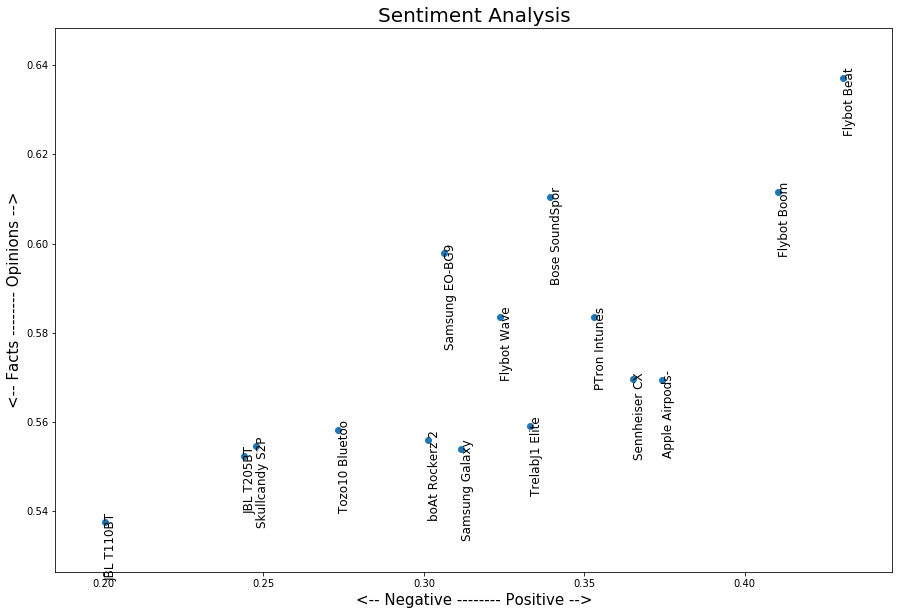

In [13]:
plt.figure(figsize=(15,10))
plt.scatter(polsub['polarity'], polsub['subjectivity'])
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)
for i in range(len(polsub)):
    x= polsub['polarity'].values
    y=polsub['subjectivity'].values
    s= polsub.index.values
    plt.annotate(s[i][:14], xy=(x[i],y[i]), fontsize=12, rotation=90)
plt.show;
plt.savefig('Overall_Sentiment_Analysis.jpg')